In [ ]:
'''
This notebook generates the figures for Immune dataset.
 - Figure 3. The aggregated confusion matrix of the Immune dataset. 
    The cell types b, e, mo, n, nk, sp, and t refer to 
            B cells, erythrocytes, monocytes, neutrophils, NK cells, CD34+ HSPCs, and T cells, respectively
 - Supplementary Figure 4. SigPrimedNet general performance for Immune dataset.
 - Supplementary Figure 5. SigPrimedNet performance for each class (Immune dataset)
'''

In [1]:
#!/usr/bin/env python
import os
import sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from scripts import config as src
import numpy as np
import pandas as pd
import datetime as dt
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

FIGURE_TITLE_SIZE = 18
SUBPLOT_TITLE_SIZE = 16
LEGEND_TITLE_SIZE = 14
FONT_SIZE = 12

plt.rc('font', size=16) # controls default text sizes
plt.rc('axes', titlesize=SUBPLOT_TITLE_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=LEGEND_TITLE_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=LEGEND_TITLE_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=LEGEND_TITLE_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE) # legend fontsize
plt.rc('legend', title_fontsize=SUBPLOT_TITLE_SIZE) # legend fontsize
plt.rc('figure', titlesize=FIGURE_TITLE_SIZE) # fontsize of the figure title

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
experiment = 'exper_immune_paper2_30iter'
loc_output = os.path.join(src.DIR_REPORTS, 'evaluate_rskf', experiment)
# title_fig = '(stratified 10-fold with 30 iteration)'
detail_='circuits**'
print(loc_output)

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter


In [4]:
# overall performance of proposed network
df_metric_overall = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'metrics_overall*{detail_}')))[:2]:
    print(i)
    df_metric_overall = pd.concat([df_metric_overall, pd.read_csv(i)])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter/metrics_overall_circuits_1_layer_immune_new_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter/metrics_overall_circuits_2_layer_immune_new_Adam_relu.csv


In [5]:
# the number of calculated metric
df_metric_overall.groupby(['design','metric']).size()

design            metric            
circuits_1_layer  accuracy              300
                  balanced accuracy     300
                  f1-macro              300
                  f1-micro              300
                  f1-weighted           300
                  precision-macro       300
                  precision-micro       300
                  precision-weighted    300
                  recall-macro          300
                  recall-micro          300
                  recall-weighted       300
circuits_2_layer  accuracy              300
                  balanced accuracy     300
                  f1-macro              300
                  f1-micro              300
                  f1-weighted           300
                  precision-macro       300
                  precision-micro       300
                  precision-weighted    300
                  recall-macro          300
                  recall-micro          300
                  recall-weighted      

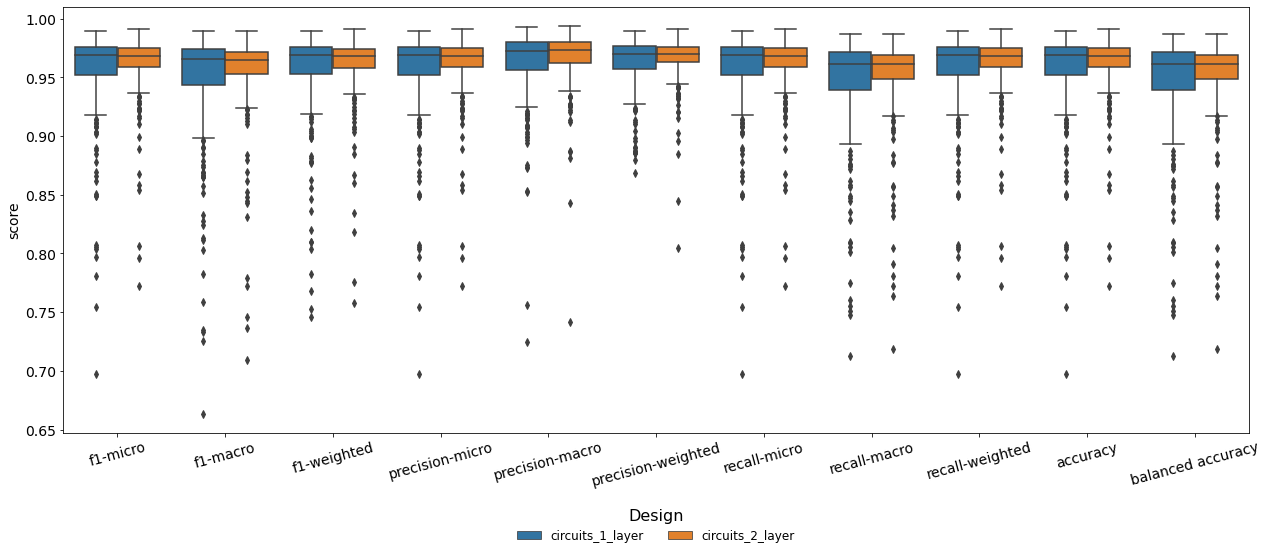

In [6]:
# Supplementary Figure 4

# the boxplot figure for calculated metric
plt.figure(figsize=(18,8))
sns.boxplot(data=df_metric_overall, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(.5, -0.15), ncol=3, frameon=False )
plt.xticks(rotation=15)
# plt.title(f'Network performance {title_fig}')
plt.tight_layout();
# exporting figure with different format
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}_30iter.png')), dpi=350, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}_30iter.pdf')), dpi=350, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}_30iter.tiff')), dpi=350, bbox_inches = 'tight', pad_inches=0.1)

In [7]:
# network performance for each cell type
df_metric_detail = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'metrics_*_detail*{detail_}*'))):
    print(i)
    df_metric_detail = pd.concat([df_metric_detail, pd.read_csv(i)])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter/metrics_cell_type_detail_circuits_1_layer_immune_new_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter/metrics_cell_type_detail_circuits_2_layer_immune_new_Adam_relu.csv


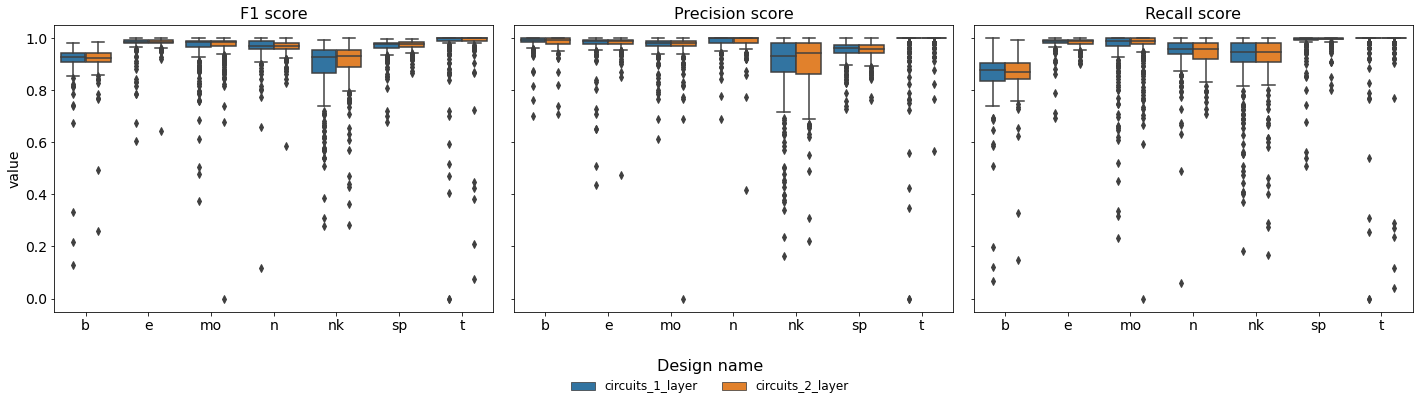

In [8]:
# Supplementary Figure 5

# the boxplot figure of f1, precision and recall metric for each cell type
fig, axes = plt.subplots(ncols=3, figsize=(20,5), sharex=True, sharey=True);
for i_metric, val_metric in enumerate(np.unique(df_metric_detail['metric'])):
    df_temp = df_metric_detail[df_metric_detail['metric']==val_metric]
    sns.boxplot(data=df_temp, x='variable', y='value', hue='design', ax=axes[i_metric]);
    axes[i_metric].set_title(f'{val_metric.capitalize()} score')
    axes[i_metric].set_xlabel('')
    axes[i_metric].set_xticklabels(axes[i_metric].get_xticklabels(), rotation=0)
    legend = axes[i_metric].get_legend()
    legend.remove()

axes[1].set_ylabel('')
axes[2].set_ylabel('')
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False, title='Design name', )
# fig.suptitle(f'Cell type performance {title_fig}')
plt.tight_layout();
# exporting figure with different format
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}_30iter.png'), dpi=350, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}_30iter.pdf'), dpi=350, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}_30iter.tiff'), dpi=350, bbox_inches = 'tight', pad_inches=0.1)

In [9]:
# the mean score of overall performance
df_metric_overall.groupby(['design'
                           , 'metric']).mean().reset_index().pivot(index='design'
                                                                   , columns='metric'
                                                                   , values='score')

metric,accuracy,balanced accuracy,f1-macro,f1-micro,f1-weighted,precision-macro,precision-micro,precision-weighted,recall-macro,recall-micro,recall-weighted
design,,,,,,,,,,,
circuits_1_layer,0.956033,0.946000,0.948861,0.956033,0.955514,0.962703,0.956033,0.963154,0.946000,0.956033,0.956033
circuits_2_layer,0.962298,0.951721,0.956028,0.962298,0.961613,0.967675,0.962298,0.965915,0.951721,0.962298,0.962298


/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter/detail_circuits_1_layer_immune_new_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_immune_paper2_30iter/detail_circuits_2_layer_immune_new_Adam_relu.csv
DESIGN circuits_1_layer
DESIGN circuits_2_layer


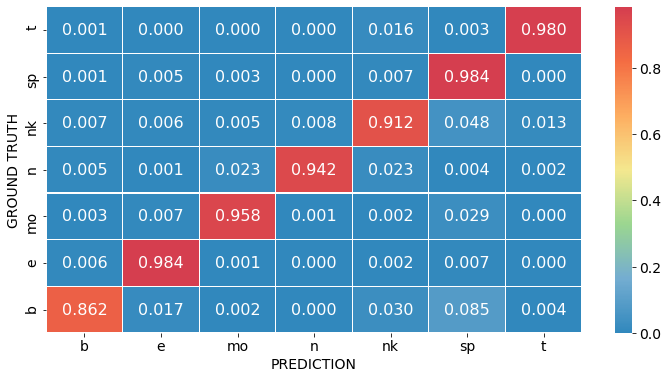

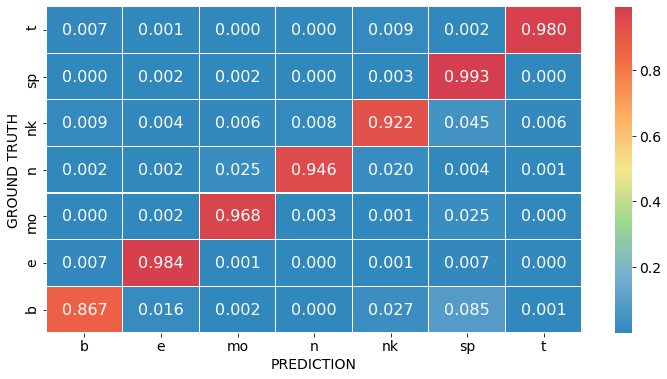

In [10]:
# Figure 3 (1-layer)

df_result = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'detail_*{detail_}*'))):
    print(i)
    df_result = pd.concat([df_result, pd.read_csv(i)])
    
for i_design in df_result['design'].unique():
    df_concat = pd.DataFrame()
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
        df_crosstab = pd.crosstab(df_temp['ground_truth'], df_temp['prediction']).div(df_temp['ground_truth'].value_counts(), axis=0)
        df_concat = df_concat.add(df_crosstab, fill_value=0)

#     exporting figure with different format
    plot_cm = src.heatmap_cv(df_concat[::-1]/(i_exp+1), title='', fmt='.3f')
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'_30_iter.png'), dpi=350, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'_30_iter.pdf'), dpi=350, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'_30_iter.tiff'), dpi=350, bbox_inches = 'tight', pad_inches=0.1)